# Charts

A chart is a pair $(U, \varphi)$, where $U$ is an open set of our manifold $M$ and $\varphi$ is a homeomorphism between $U$ and some open subset of $\mathbb{R}^n$, that assigns coordinates $x^i$ to points in $U$. 
In this notebook, we explore some examples with interactive visualizations (the cells have to be executed for the interactive functionality).

N.B. The distinction between the coordinates $x^i$ and the variable $x$ raised to the $i$-th power should be clear from the context. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

## Monge charts

Whenever an open set $U\in M$ can be obtained as the graph of a function $z:\mathbb{R}^n\rightarrow\mathbb{R}$ (restricted to some open set of $\mathbb{R}^n$), the "trivial" parametrization is given by the argument of the function. In 2D, for example, the points in $M\ni p = (x, y, z)$, considered as a surface embedded in $\mathbb{R}^3$ are defined to be
\begin{align*}
    x &= x^1, \\
    y &= x^2, ~\text{and}\\
    z &= z(x^1, x^2),
\end{align*} 
in terms of the coordinates $x^1$ and $x^2$. Such charts are known as Monge charts. Some examples of manifolds that can be globally covered by a Monge chart include the hyperbolic paraboloid ($z = x^2 - y^2$), the elliptical paraboloid ($z = x^2 + y^2$), or the function $z = \dfrac{\cos^2\left(x^2 + y^2\right)}{x^2 + y^2 + 1/2}$, visually represented below. The curves on the surfaces represent the coordinate lines, defined by $x^1 = \text{constant}$ and $x^2=\text{constant}$.

Execute the cell below to allow for interactive manipulation of the figures.

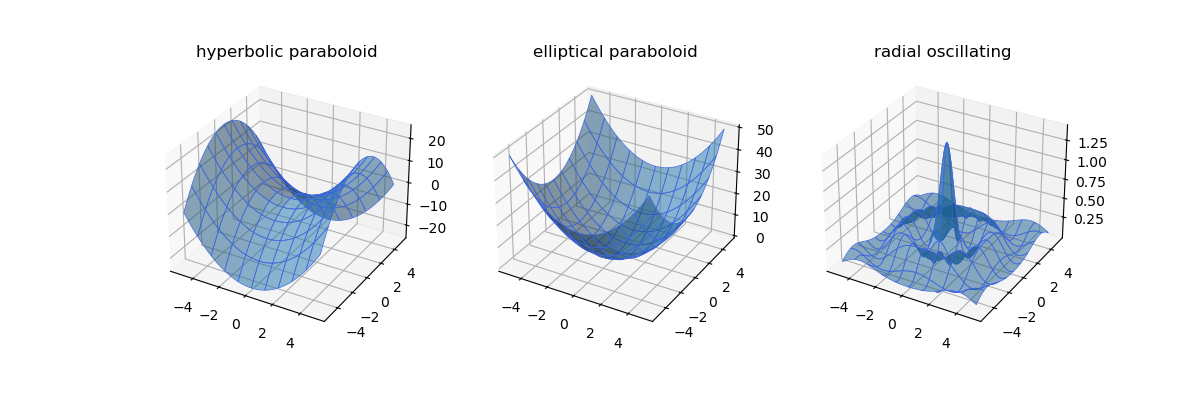

In [2]:
# coordinates
x1 = np.reshape(np.linspace(-5, 5, 101), (1, -1))
x2 = np.reshape(np.linspace(-5, 5, 101), (-1, 1))

# build points in R^3 as functions of the coordinates
x = x1
y = x2
z = dict()

z["hyperbolic paraboloid"] = x1**2 - x2**2
z["elliptical paraboloid"] = x1**2 + x2**2
z["radial oscillating"] = np.cos(np.sqrt(x1**2 + x2**2))**2 / np.sqrt(x1**2 + x2**2 + .5)

# plot
fig, axs = plt.subplots(1, len(z), subplot_kw={"projection": "3d"}, figsize= (4*len(z), 4))

for key, ax in zip(z.keys(), axs):
    ax.plot_surface(x, y, z[key], edgecolor='royalblue', lw=0.5, rstride=10, cstride=10, alpha=0.5)
    ax.set_title(key)


## Angular coordinates

The following examples are two of the most celebrated two-dimensional manifolds: the sphere and the torus (doughnut). Both can be parametrized (given coordinates) through two angles, $x^1 = \theta\in(0, \pi)$ and $x^1 = \phi\in(0, 2\pi)$.

The points on the sphere, viewed as embedded in $\mathbb{R}^3$, are
\begin{align*}
    x &= R\sin(x^1)\cos(x^2), \\
    y &= R\sin(x^1)\sin(x^2), ~\text{and}\\
    z &= R\cos(x^1).
\end{align*}
We will set $R = 1$ without loss of generality.

As for the torus, we have
\begin{align*}
    x &= \cos(2 x^1)(R_1 + R_2 \cos(x^2)), \\
    y &= \sin(2 x^1)(R_1 + R_2 \cos(x^2)), ~\text{and}\\
    z &= R_2\sin(x^2).
\end{align*}

Note that the poles of the sphere and the circles $\theta=0$ and $\phi=0$ are technically excluded from these charts, because both $U$ and $\varphi(U)$ have to be open.

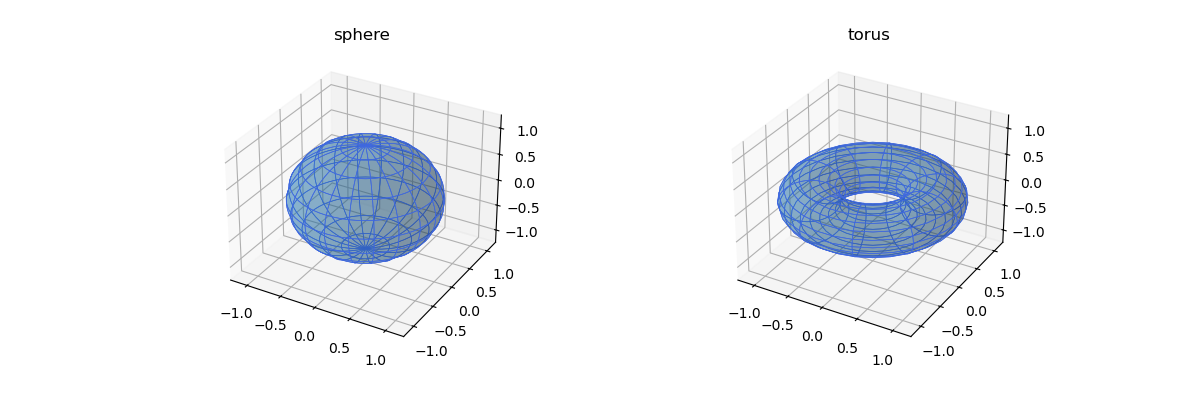

In [3]:
# coordinates
x1 = np.reshape(np.linspace(0, np.pi, 31), (1, -1))
x2 = np.reshape(np.linspace(0, 2 * np.pi, 61), (-1, 1))

# build points in R^3 as functions of the coordinates
x = dict()
y = dict()
z = dict()

x["sphere"] = np.sin(x1) * np.cos(x2) 
y["sphere"] = np.sin(x1) * np.sin(x2) 
z["sphere"] = np.cos(x1) * np.ones(x2.shape)

x["torus"] = np.cos(2 * x1) * (0.8 + 0.4 * np.cos(x2))
y["torus"] = np.sin(2 * x1) * (0.8 + 0.4 * np.cos(x2))
z["torus"] = 0.4 * np.sin(x2)

# plot
fig, axs = plt.subplots(1, len(z), subplot_kw={"projection": "3d"}, figsize= (12, 4))

for key, ax in zip(z.keys(), axs):
    ax.plot_surface(x[key], y[key], z[key], edgecolor='royalblue', lw=0.5, rstride=3, cstride=3, alpha=0.3)
    ax.set_title(key)
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.set_zlim(-1.2, 1.2)

## Alternative parametrizations/coordinates for the sphere

We have seen above the most natural parametrization of the sphere in terms of the polar angle and azimuth. However, just for fun and for the sake of illustration, let us discuss alternative coordinate systems that can be fixed on the sphere. The first one is the so-called projective sphere, with coordinates $x^1$ and $x^2$ as usual. There are a bunch of similar versions, so let's be precise about it. The projective coordinates for a point $p = (x, y, z)$ that satisfies $x^2 + y^2 + z^2 = 1$ are obtained as follows.
1. Draw the straight line that goes through $p$ and the North Pole. 
2. Find the intersection point $p'$ of such line with the equatorial plane of the sphere (the $x-y$ plane).
3. The $x$ and $y$ coordinates of the intersection point $p' = (x', y', 0)$ are the projective coordinates: $x^1 = x'$ and $x^2 = y'$.

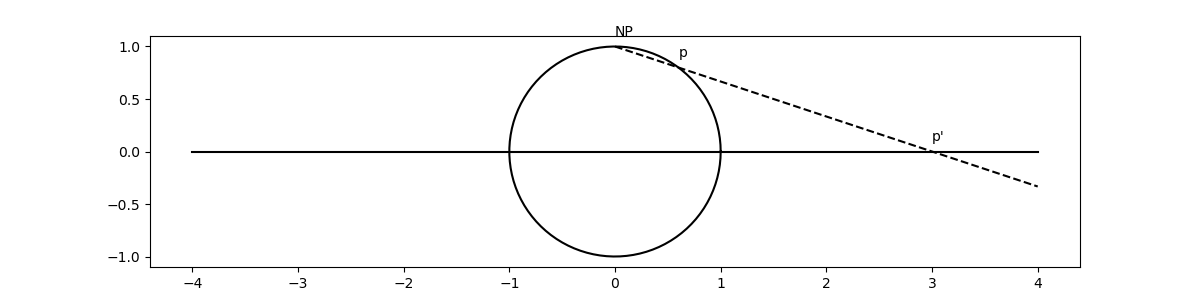

In [4]:
t = np.linspace(0, 2 * np.pi, 100)
x_sphere = np.cos(t)
z_sphere = np.sin(t)
x_line = np.linspace(0, 4, 10)
z_line = -(x_line - 3) / 3

fig = plt.figure(figsize=(12, 3))
plt.plot(x_sphere, z_sphere, "k")
plt.plot([-4, 4], [0, 0], "k")
plt.plot(x_line, z_line, "--k")
plt.annotate(text="NP", xy=(0, 1.1), xycoords="data")
plt.annotate(text="p'", xy=(3, 0.1), xycoords="data")
plt.annotate(text="p", xy=(2*3 / (1 + 3**2), 0.9), xycoords="data");

The points of the sphere in $\mathbb{R}^3$ are given by
\begin{align*}
    x &= \frac{2x^1}{1 + (x^1)^2 + (x^2)^2}, \\
    y &= \frac{2x^2}{1 + (x^1)^2 + (x^2)^2}, ~\text{and}\\
    z &= \frac{(x^1)^2 + (x^2)^2 - 1} {1 + (x^1)^2 + (x^2)^2}.
\end{align*}
You should try work out these relations by yourself with the help of the diagram above (or pay attention to your lecturer when they do). You should also convince yourself that the curves corresponding to $x^1=\text{constant}$ and $x^2=\text{constant}$ map to circles on the sphere, as illustrated below.

The other possible parametrization we discuss here is the Monge chart for the Northern Hemisphere. The function is, obviously, $z = \sqrt{1 - (x^1)^2 - (x^2)^2}$.

/var/folders/pg/nc99n5rx3kdf1kcz_wt1kygc0000gn/T/ipykernel_53895/1949697952.py:20: RuntimeWarning: invalid value encountered in sqrt
  z["sphere in Cartesian projection"] = np.sqrt(1 - x1**2 - x2**2)


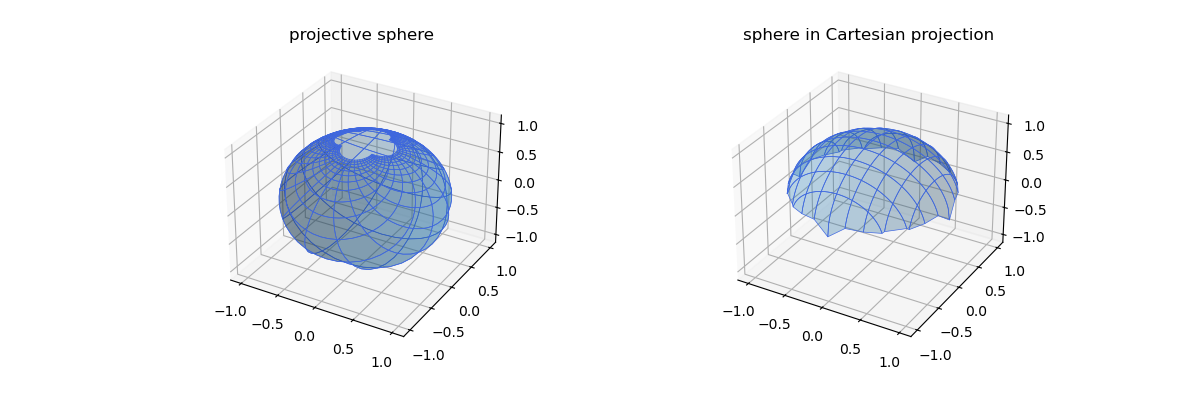

In [ ]:
# coordinates
x1 = np.reshape(np.linspace(-5, 5, 101), (1, -1))
x2 = np.reshape(np.linspace(-5, 5, 101), (-1, 1))

# build points in R^3 as functions of the coordinates
x = dict()
y = dict()
z = dict()

x["projective sphere"] = 2 * x1 / (1 + x1**2 + x2**2)
y["projective sphere"] = 2 * x2 / (1 + x1**2 + x2**2)
z["projective sphere"] = (x1**2 + x2**2 - 1) / (1 + x1**2 + x2**2)

# coordinates again (merely reducing the range they span)
x1 = np.reshape(np.linspace(-1, 1, 101), (1, -1))
x2 = np.reshape(np.linspace(-1, 1, 101), (-1, 1))

x["sphere in Cartesian projection"] = x1 
y["sphere in Cartesian projection"] = x2
z["sphere in Cartesian projection"] = np.sqrt(1 - x1**2 - x2**2)

fig, axs = plt.subplots(1, len(z), subplot_kw={"projection": "3d"}, figsize= (12, 4))
strides = [4, 10]

for s, key, ax in zip(strides, z.keys(), axs):
    ax.plot_surface(x[key], y[key], z[key], edgecolor='royalblue', lw=0.5, rstride=s, cstride=s, alpha=0.3)
    ax.set_title(key)
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.set_zlim(-1.1, 1.1)

Restricted to the intersection of both charts, the Northern Hemisphere, we can graphically represent the transformation from one coordinate system to the other. To do that, we must follow these steps. 
1. Set up a grid in the (base) parameter space $x^i$ (or $x^{\prime i}$) with respect to which we want to visualize the other coordinates $x^{\prime i}$ (or $x^i$).
2. Obtain the other coordinates as functions of the base coordinates: $x^{\prime i}(x^i)$ (or $x^i(x^{\prime i})$)
3. Represent the contours of those functions in the base parameter space

We can represent the projective coordinates in terms of the Cartesian coordinates (restricted to the unit circle), or vice versa. The next code cell does precisely this.

/var/folders/pg/nc99n5rx3kdf1kcz_wt1kygc0000gn/T/ipykernel_53895/1541548386.py:8: RuntimeWarning: invalid value encountered in sqrt
  x1p = x1 / (1 - np.sqrt(1 - x1**2 - x2**2))
/var/folders/pg/nc99n5rx3kdf1kcz_wt1kygc0000gn/T/ipykernel_53895/1541548386.py:8: RuntimeWarning: invalid value encountered in divide
  x1p = x1 / (1 - np.sqrt(1 - x1**2 - x2**2))
/var/folders/pg/nc99n5rx3kdf1kcz_wt1kygc0000gn/T/ipykernel_53895/1541548386.py:9: RuntimeWarning: invalid value encountered in sqrt
  x2p = x2 / (1 - np.sqrt(1 - x1**2 - x2**2))
/var/folders/pg/nc99n5rx3kdf1kcz_wt1kygc0000gn/T/ipykernel_53895/1541548386.py:9: RuntimeWarning: invalid value encountered in divide
  x2p = x2 / (1 - np.sqrt(1 - x1**2 - x2**2))


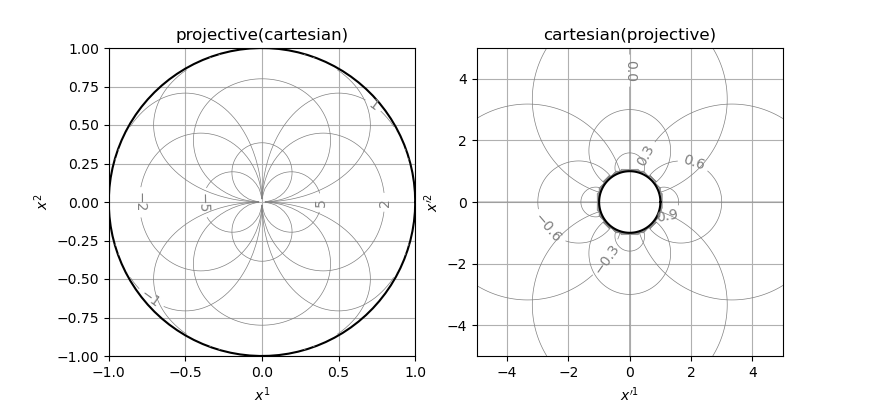

In [6]:
# projective coordinates as a function of the cartesian coordinates

# cartesian coordinates
x1 = np.reshape(np.linspace(-1, 1, 101), (1, -1))
x2 = np.reshape(np.linspace(-1, 1, 101), (-1, 1))

# projective coordinates as a function of the cartesian ones
x1p = x1 / (1 - np.sqrt(1 - x1**2 - x2**2))
x2p = x2 / (1 - np.sqrt(1 - x1**2 - x2**2))

# plot x(xp)
fig, axs = plt.subplots(1, 2, figsize=(8.7, 4))
axs[0].set_title("projective(cartesian)")
axs[0].set_xlabel("$x^1$")
axs[0].set_ylabel("$x^2$")

t = np.linspace(0, 2 * np.pi, 100)
axs[0].plot(np.cos(t), np.sin(t), color="k")

cont1 = axs[0].contour(x1[0, :], x2[:, 0], x1p, levels=[-5, -2, -1, 1, 2, 5], negative_linestyles="solid", colors="gray", linewidths=0.5)
cont2 = axs[0].contour(x1[0, :], x2[:, 0], x2p, levels=[-5, -2, -1, 1, 2, 5], negative_linestyles="solid", colors="gray", linewidths=0.5)
axs[0].clabel(cont1, fontsize=10, manual=[(1, 1), (0.7, 0.0), (0.3, 0.0), (-0.3, 0.0), (-0.7, 0), (-1, -1)])
axs[0].grid()

# cartesian coordinates as a function of the projective coordinates
axs[1].set_title("cartesian(projective)")
axs[1].set_xlabel("$x^{\prime 1}$")
axs[1].set_ylabel("$x^{\prime 2}$")

# projective coordinates
x1p = np.reshape(np.linspace(-5, 5, 151), (1, -1))
x2p = np.reshape(np.linspace(-5, 5, 151), (-1, 1))

# cartesian coordinates as a function of the projective ones
x1 = 2 * x1p / (1 + x1p**2 + x2p**2) * (x1p**2 + x2p**2 > 1.1)
x2 = 2 * x2p / (1 + x1p**2 + x2p**2) * (x1p**2 + x2p**2 > 1.1)

# plot xp(x)

cont1 = axs[1].contour(x1p[0, :], x2p[:, 0], x1, levels=np.linspace(-0.9, 0.9, 7), negative_linestyles="solid", colors="gray", linewidths=0.5)
cont2 = axs[1].contour(x1p[0, :], x2p[:, 0], x2, levels=np.linspace(-0.9, 0.9, 7), negative_linestyles="solid", colors="gray", linewidths=0.5)
axs[1].clabel(cont1, fontsize=10)
axs[1].grid()

axs[1].plot(np.cos(t), np.sin(t), color="k")

## Cylinder

dos parametrizaciones

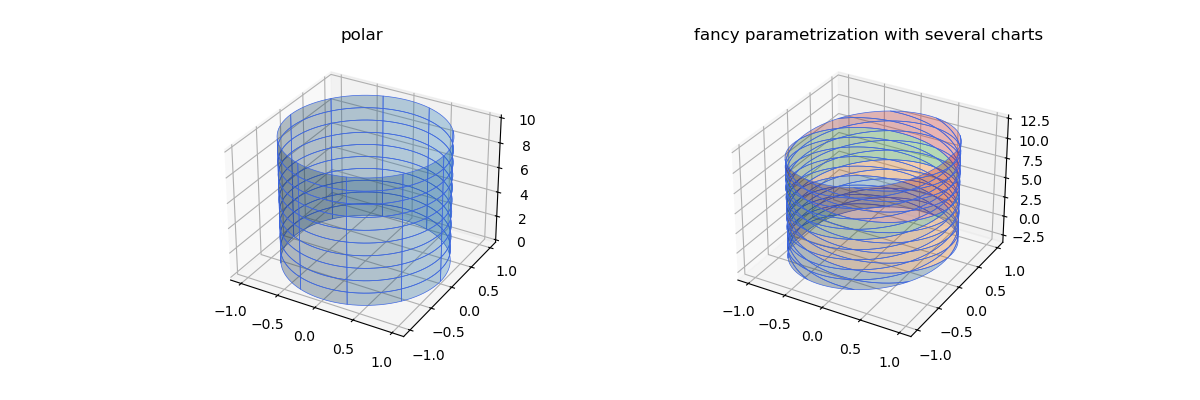

In [34]:
# coordinates
x1 = np.reshape(np.linspace(0, 10, 101), (1, -1))  # z
x2 = np.reshape(np.linspace(0, 2 * np.pi, 101), (-1, 1))  # angle

# build points in R^3 as functions of the coordinates


x = np.cos(x2)
y = np.sin(x2)
z = x1

fig, axs = plt.subplots(1, 2, subplot_kw={"projection": "3d"}, figsize= (12, 4))

axs[0].plot_surface(x, y, z, edgecolor='royalblue', lw=0.5, rstride=10, cstride=10, alpha=0.3)
axs[0].set_title("polar")

# new coordinates
x1p = np.reshape(np.linspace(0, np.sqrt(2)*np.pi, 41), (1, -1))  # z
x2p = np.reshape(np.linspace(0, np.sqrt(2)*np.pi, 41), (-1, 1))  # angle

x = dict()
y = dict()
z = dict()

x["chart 1"] = np.cos((x1p + x2p) / np.sqrt(2))
y["chart 1"] = np.sin((x1p + x2p) / np.sqrt(2))
z["chart 1"] = (x1p - x2p) / np.sqrt(2)

x["chart 2"] = -np.cos((x1p + x2p) / np.sqrt(2))
y["chart 2"] = -np.sin((x1p + x2p) / np.sqrt(2))
z["chart 2"] = (x1p - x2p) / np.sqrt(2) + np.pi

x["chart 3"] = np.cos((x1p + x2p) / np.sqrt(2))
y["chart 3"] = np.sin((x1p + x2p) / np.sqrt(2))
z["chart 3"] = (x1p - x2p) / np.sqrt(2)  + 2 * np.pi

x["chart 4"] = -np.cos((x1p + x2p) / np.sqrt(2))
y["chart 4"] = -np.sin((x1p + x2p) / np.sqrt(2))
z["chart 4"] = (x1p - x2p) / np.sqrt(2) + 3 * np.pi

for key in z.keys():
    axs[1].plot_surface(x[key], y[key], z[key], edgecolor='royalblue', lw=0.5, rstride=8, cstride=8, alpha=0.3)
    axs[1].set_title("fancy parametrization with several charts")